# Projet Final : Analyse des Données Spotify

## Partie 1

Dans un premier temps, nous allons importer les librairies dont nous allons avoir besoin.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Importation des données

In [2]:
df1=pd.read_csv("data/artists.csv")
df2=pd.read_csv("data/tracks.csv")
df3=pd.read_csv("data/spotify_top200_global.csv")

Afin de ne pas risquer d'affecter les dataframes originaux, nous avons décidé de créer des copies.

In [3]:
df_artists=df1.copy(deep=True)
df_tracks=df2.copy(deep=True)
df_top200=df3.copy(deep=True)

### Nettoyage des données

In [4]:
# Il s'agira d'abord d'adapter les types de variables correctement 

df_top200['Streams'] = df_top200['Streams'].astype("int")
df_top200["Date"] = pd.to_datetime(df_top200["Date"], format="%Y-%m-%d")
df_top200 = df_top200.drop(['Country'],axis=1) # On l'enlève car il s'agit de "global" partout ici 


df_tracks["release_date"] = pd.to_datetime(df_tracks["release_date"], format="mixed")
df_tracks['popularity'] = df_tracks['popularity'].astype("float")

# On ajoute une colonne de l'annee de sortie, qui nous sera utile plus tard
df_tracks["release_year"] = df_tracks["release_date"].dt.strftime("%Y")

# On ôte les signes "parasites"
df_tracks['artists']=df_tracks['artists'].str.replace("['","")
df_tracks['artists']=df_tracks['artists'].str.replace("']","")

# Nous remplaçons aussi les valeurs manquantes par 'missing'
df_tracks['name'] = df_tracks['name'].fillna('missing')

# On retire les crochets autour des id des artists 
df_tracks['id_artists'] = df_tracks['id_artists'].apply(lambda x: x.strip('[]') if pd.notna(x) else x)


# Et on remplace les valeurs manquantes par 'missing'
df_artists['name'] = df_artists['name'].fillna('missing')
df_artists['followers'] = df_artists['followers'].fillna('missing')

# Pour la colonne 'genres' on va d'abord supprimer les crochets puis remplacer les valeurs manquantes par "missing"
df_artists['genres'] = df_artists['genres'].apply(lambda x: "missing" if pd.isna(x) or x.strip('[]') == '' else x.strip('[]'))


In [5]:
# on vérifie que le nettoyage a bien eu lieu comme on le voulait 

df_artists.tail(15)

df_tracks.head(15)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,Uli,'45tIt06XoI0Iio4LBEVpls',1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,Fernando Pessoa,'14jtPCOoNZwquk5wd9DxrY',1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,Ignacio Corsini,'5LiOoJbxVSAMkBS2fUm3X2',1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0.0,176907,0,Ignacio Corsini,'5LiOoJbxVSAMkBS2fUm3X2',1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,Dick Haymes,'3BiJGZsyX9sJchTqcSA7Su',1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0.0,178933,0,Dick Haymes,'3BiJGZsyX9sJchTqcSA7Su',1922-01-01,0.227,0.2610,...,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1922
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0.0,134467,0,Francis Marty,'2nuMRGzeJ5jJEKlfS7rZ0W',1922-01-01,0.510,0.3550,...,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1922
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0.0,161427,0,Mistinguett,'4AxgXfD7ISvJSTObqm4aIE',1922-01-01,0.563,0.1840,...,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1922
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0.0,310073,0,Greg Fieler,'5nWlsH5RDgFuRAiDeOFVmf',1922-01-01,0.488,0.4750,...,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0.0,181173,0,Ignacio Corsini,'5LiOoJbxVSAMkBS2fUm3X2',1922-03-29,0.548,0.0391,...,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1922


On a réfléchi à ôter un certain nombre de colonnes pour avoir une visibilité plus nette et claire, mais finalement nous pourrions avoir besoin de certaines variables pour la question 4, donc on a décidé de limiter le nettoyage tel quel pour l'instant. 

## Analyse introductive 

Ici, nous demandons un certain nombre d'informations, notamment sur les types de variables ou encore les tailles des dataframes. Ces informations nous seront très utiles plus tard ! En effet, elles ont permis de repérer pourquoi certains codes ne fonctionnaient pas à cause de certains types de variables. Il est donc pratique de pouvoir vérifier le summary à tout moment avec la fonction créée.  

In [6]:
def summary(df):
    nbr_obs = df.shape[0]
    nbr_col = df.shape[1]
    size_file = df.size
    print("La taille du dataframe est ", size_file) 
    print("Les données du dataframe sont : \n", df.dtypes)
    return("Il y a %d observations et %d colonnes"%(nbr_obs, nbr_col))
print(summary(df_artists))
print(summary(df_top200))
print(summary(df_tracks))

La taille du dataframe est  5810475
Les données du dataframe sont : 
 id            object
followers     object
genres        object
name          object
popularity     int64
dtype: object
Il y a 1162095 observations et 5 colonnes
La taille du dataframe est  366000
Les données du dataframe sont : 
 Artist             object
Date       datetime64[ns]
Rank                int64
Streams             int64
Title              object
dtype: object
Il y a 73200 observations et 5 colonnes
La taille du dataframe est  12320112
Les données du dataframe sont : 
 id                          object
name                        object
popularity                 float64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                     

## Question 1

### Les 10 artistes les plus populaires 

Ici, on prend donc en compte l'indice de popularité, donné par la variable 'popularity'.

In [7]:
# Pour cette question 1 et pour un résultat plus propre, 
# j'attribue les variables dont je vais avoir besoin à df_popularity

df_popularity = df_artists.loc[:, ['name', 'popularity', 'followers']]

# Je vais ranger les variables par ordre décroissant afin d'en faire ressortir le top 10

df_top10 = df_popularity.sort_values(by='popularity', ascending=False)

top10_artists = df_top10.head(10)

print(top10_artists)

                 name  popularity   followers
144481  Justin Bieber         100  44606973.0
126338   Taylor Swift          98  38869193.0
313676          Drake          98  54416812.0
115489      Bad Bunny          98  32244734.0
144484            BTS          96  31623813.0
144483     The Weeknd          96  31308207.0
115490     Juice WRLD          96  16996777.0
115491    Myke Towers          95   5001808.0
144487       Dua Lipa          95  24123468.0
144486       J Balvin          95  27286822.0


### Graphique en fonction du nombre d'abonnés décroissant 

                 name  popularity   followers
313676          Drake          98  54416812.0
144481  Justin Bieber         100  44606973.0
126338   Taylor Swift          98  38869193.0
115489      Bad Bunny          98  32244734.0
144484            BTS          96  31623813.0
144483     The Weeknd          96  31308207.0
144486       J Balvin          95  27286822.0
144487       Dua Lipa          95  24123468.0
115490     Juice WRLD          96  16996777.0
115491    Myke Towers          95   5001808.0


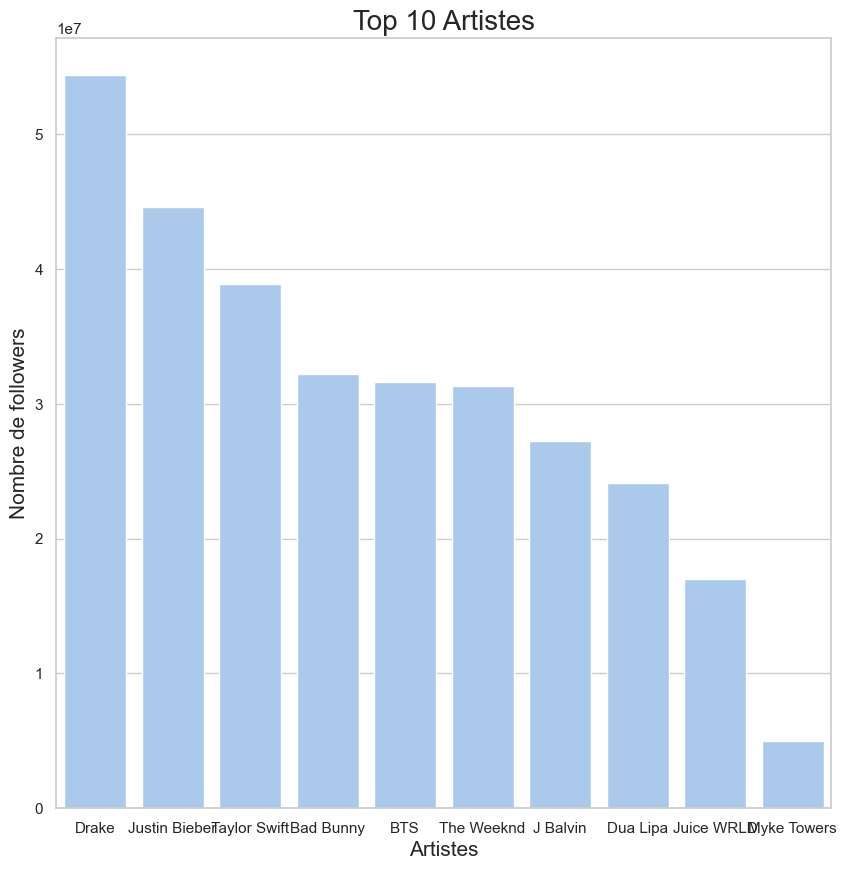

In [8]:
# Je veux classer ces 10 artistes les plus populaires selon leur nombre d'abonnés

df_followers = top10_artists.loc[:, ['name', 'popularity', 'followers']]

df_top = df_followers.sort_values(by='followers', ascending=False)

top10 = df_top.head(10)

print(top10) # On obtient donc le top10 mais cette fois-ci classé selon le nombre d'abonnés


# On représente ceci graphiquement

plt.figure(figsize=(10,10))
sns.set_theme(style = "whitegrid", palette = "pastel")
sns.barplot(x = 'name', y = 'followers', data = top10,
             color = 'b',errorbar=None)
plt.ylabel('Nombre de followers', fontsize=15)
plt.xlabel('Artistes',fontsize=15)
plt.title("Top 10 Artistes", fontsize=20)
plt.show()

En effet, pour cette exercice je me suis questionnée quant au fait de classer la popularité des artistes directement selon leur nombre d'abonnés. Cela dit, peut-être que l'attendu était bel et bien de prendre l'indice de popularité en premier. Ainsi, j'ai laissé les deux programmes.

On obtient donc un classement des 10 artistes les plus populaires.

Le graphique représente bien les 10 artistes avec le plus grand nombre d'abonnés sur Spotify, en ordre décroissant.

## Question 2

Pour cette deuxième question, on nous demandait tout d'abord de calculer le nombre de chansons sorties chaque année, puis de représenter graphiquement ces résultats.  

J'ai donc procédé de la manière suivante : 

,name,release_date,artists,release_year
0,Carve,1922-02-22,Uli,1922
1,Capítulo 2.16 - Banquero Anarquista,1922-06-01,Fernando Pessoa,1922
2,Vivo para Quererte - Remasterizado,1922-03-21,Ignacio Corsini,1922
3,El Prisionero - Remasterizado,1922-03-21,Ignacio Corsini,1922
4,Lady of the Evening,1922-01-01,Dick Haymes,1922


name                    object
release_date    datetime64[ns]
artists                 object
release_year            object
dtype: object
La taille du dataframe est  2346688
Les données du dataframe sont : 
 name                    object
release_date    datetime64[ns]
artists                 object
release_year            object
dtype: object
Il y a 586672 observations et 4 colonnes


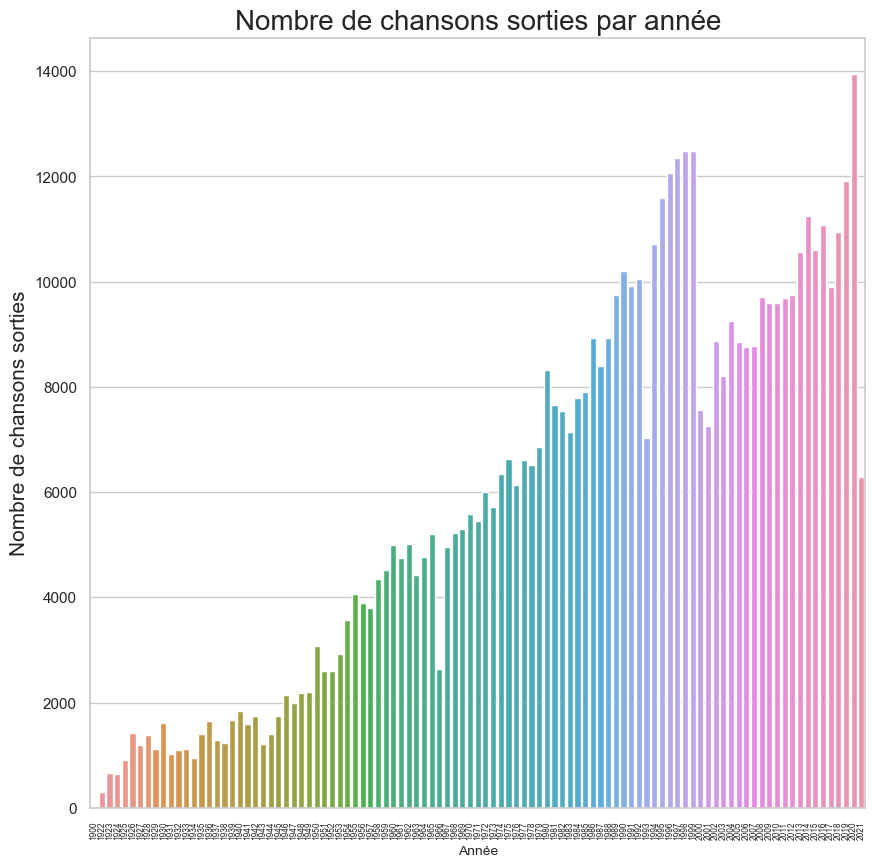

In [9]:
# Je garde les variables utiles pour une analyse claire et concise 
df_yearly = df_tracks.loc[:, ['name', 'release_date', 'artists']] 

# Je m'assure d'avoir le bon type de variable 
df_yearly["release_year"] = df_yearly["release_date"].dt.strftime("%Y")
display(df_yearly.head())
print(df_yearly.dtypes)

df_yearly.groupby("release_year")["name"].count()

print(summary(df_yearly))

resultat = df_yearly.groupby("release_year")["name"].count().reset_index()

# Création du graphique

plt.figure(figsize=(10,10))
sns.barplot(x='release_year', y='name', data=resultat)
plt.xlabel('Année', fontsize=10)
plt.ylabel('Nombre de chansons sorties', fontsize=15)
plt.xticks(rotation='vertical', fontsize=6) # je mets la légende à la verticale pour une meilleure lisibilité 
plt.title('Nombre de chansons sorties par année',fontsize=20)
plt.show()

Pour cette question on s'est donc servi de la fonction groupby(). 

Le graphique obtenu est très satisfaisant et nous donne une idée des évolutions des sorties de chansons par an sur Spotify. 

## Question 3

"Quels artistes ont le plus de chansons distinctes dans le top 200 Global ? En cas d’égalité, les ordonner 
par nombre de streams cumulés décroissants. Représenter graphiquement les résultats."

            Artist  Title
340     Juice WRLD   2201
100  Billie Eilish   2017
226     Ed Sheeran   1554
572    Post Malone   1313
275   Harry Styles   1313
568      Pop Smoke   1285
708   Travis Scott   1264
55   Ariana Grande   1176
70        Bad Bunn   1142
219       Dua Lipa   1077
698     The Weeknd   1057
746   XXXTENTACION   1020
292       J Balvin   1015
409  Lewis Capaldi    989
216          Drake    888


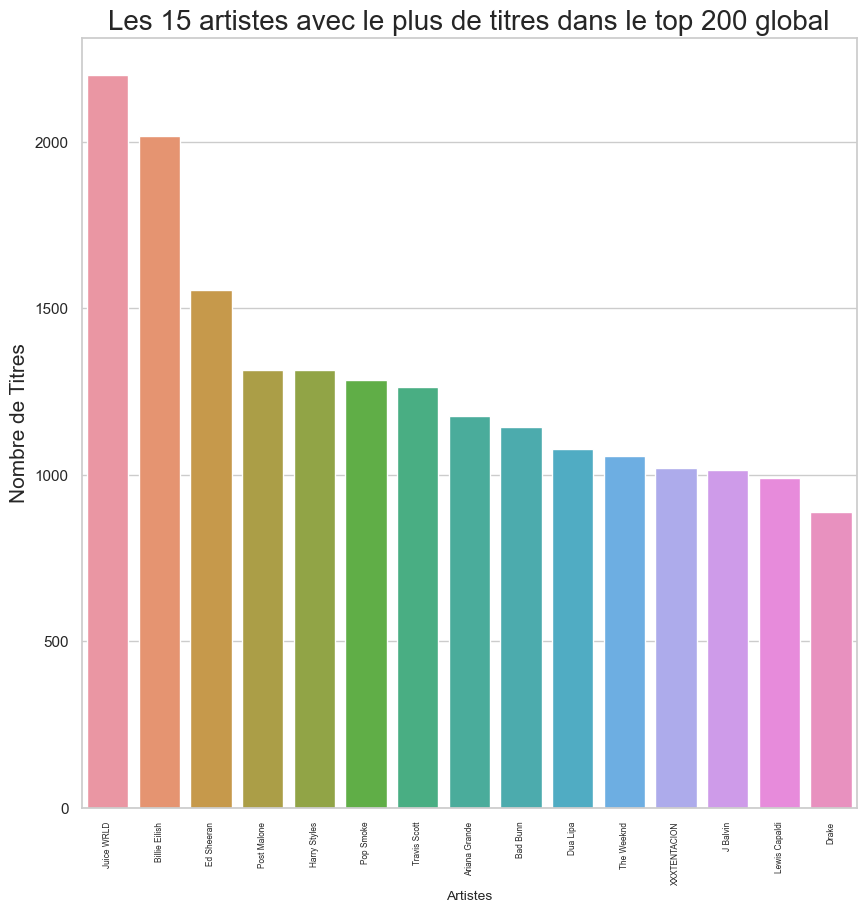

In [10]:
# J'appelle le nouveau DataFrame popular_artists
# et je vais chercher les valeurs dans le DataFrame df_top200 

popular_artists = df_top200.groupby("Artist")["Title"].count().reset_index()
popular_artists = popular_artists.sort_values(by='Title', ascending=False)

# où la colonne 'Title' va représenter le nombre de titres de l'artiste apparaissant dans le top200


# Pour répondre à la question, nous allons en faire un top15, que nous allons représenter graphiquement.
top15 = popular_artists.head(15)
print(top15)

plt.figure(figsize=(10,10))
sns.barplot(x='Artist', y='Title', data=top15)
plt.xlabel('Artistes', fontsize=10)
plt.ylabel('Nombre de Titres', fontsize=15)
plt.xticks(rotation='vertical', fontsize=6)
plt.title('Les 15 artistes avec le plus de titres dans le top 200 global',fontsize=20)
plt.show()


Comme mentionné dans le code, nous précisons qu'ici la valeur 'Title' représente le nombre de titres de l'artiste présents dans le top 200 global. 

On remarque donc qu'un certain nombre d'artistes populaires y figurent. 

## Question 4

"Existe-t-il un lien entre la popularité d’une chanson et les autres critères présents dans les données ?"

Pour cette question, j'ai voulu analysé la corrélation entre la popularité d'une chanson et un certain nombres de variables. 

Afin de réaliser cette analyse, j'ai dû garder les variables de type numérique (float). 

Nous verrons que le graphique à la fin nous permet d'avoir un certain nombre d'informations visuellement.

                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000     0.027681  0.211758      0.187000  0.302315   
duration_ms         0.027681     1.000000 -0.016747     -0.120371  0.024825   
explicit            0.211758    -0.016747  1.000000      0.150229  0.123076   
danceability        0.187000    -0.120371  0.150229      1.000000  0.241563   
energy              0.302315     0.024825  0.123076      0.241563  1.000000   
key                 0.015299     0.004626  0.010932      0.018824  0.036294   
loudness            0.327028     0.000337  0.134603      0.251436  0.764735   
mode               -0.033655    -0.027610 -0.051754     -0.044719 -0.065246   
speechiness        -0.047357    -0.125771  0.102258      0.199310 -0.053506   
acousticness       -0.370882    -0.064434 -0.149018     -0.242951 -0.715412   
instrumentalness   -0.236487     0.069278 -0.067520     -0.225900 -0.195839   
liveness           -0.048740     0.002137 -0.013114 

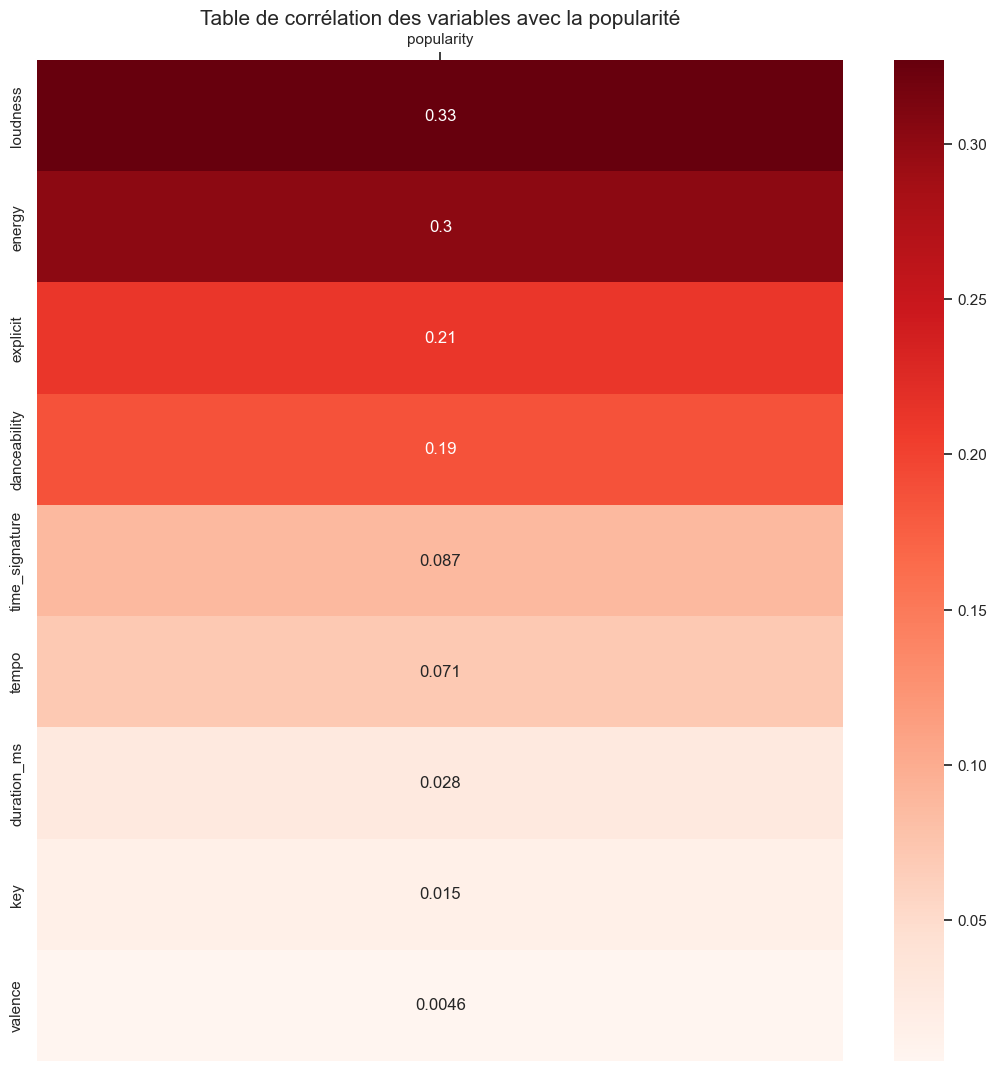

In [11]:
# On garde les variables numériques
question4 = df_tracks.drop(['id','name','artists','id_artists','release_date','release_year'],axis=1)


# Analyse de corrélation

cols = ["popularity"]
corr_matrix = question4.corr()

correlation=corr_matrix[cols]
correlation_interval=correlation.loc[(0<correlation["popularity"]) & 
                                     (correlation["popularity"]<1)].sort_values("popularity",ascending=False)
# correlation_interval va filtrer les valeurs comprises entre (0, 1) afin de faire ressortir les corrélations positives

print(corr_matrix)
print(correlation) # les coefficients de corrélation
print(correlation_interval) # les corrélations positives 


# Création d'une heatmap pour visualiser les différents coefficients de corrélation

plt.figure(figsize=(13,13))
corr_plot=sns.heatmap(correlation_interval, annot=True, cmap='Reds')
corr_plot.set(xlabel="",ylabel="")
corr_plot.xaxis.tick_top()
plt.title("Table de corrélation des variables avec la popularité", fontsize=15)
plt.show()

Résultat de l'analyse et Interprétation :

Globalement, les coefficients de corrélation de ces variables sont plutôt faibles.

Il semblerait que le volume global de la chanson (loudness) ait la plus forte corrélation avec la popularité ici (33%). Elle est de 30% pour l’énergie de la chanson. 
A l'inverse, il semblerait que des variables telles que la durée d'une chanson ou sa valence n'aient pas vraiment d'impact sur la popularité.
En outre, les seules variables qui peuvent sembler pertinentes à notre analyse sont la loudness, l'energy, et le fait que le contenu soit explicite ou non.

Nous pensons que la popularité d'une chanson dépend surtout d'autres critères subjectifs, la popularité de l'artiste en lui-même, la promotion des titres, surtout avec des outils comme tiktok aujourd'hui par exemple. Cela s'inscrit dans un prolongement d'application qui pourrait faire l'objet d'une nouvelle analyse multidimensionnelle où l'on pourrait par exemple comparer l'impact sur les nombres de Streams avec l'explosion de Tiktok depuis 2020.
